In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss
import operator
import json
from IPython import display
import os
import warnings

np.random.seed(0)
warnings.filterwarnings("ignore")
THRESHOLD = 4


|Task: To predict whether the user likes the mobile phone or not.    
Assumption: If the average rating of mobile >= threshold, then the user likes it, otherwise not.

Missing values: 'Also Known As'(459),'Applications'(421),'Audio Features'(437),'Bezel-less display'(266),'Browser'(449),'Build Material'(338),'Co-Processor'(451),'Display Colour'(457),'Mobile High-Definition Link(MHL)'(472),'Music'(447) 'Email','Fingerprint Sensor Position'(174),'Games'(446),'HDMI'(454),'Heart Rate Monitor'(467),'IRIS Scanner'(467), 'Optical Image Stabilisation'(219),'Other Facilities'(444),'Phone Book'(444),'Physical Aperture'(87),'Quick Charging'(122),'Ring Tone'(444),'Ruggedness'(430),SAR Value(315),'SIM 3'(472),'SMS'(470)', 'Screen Protection'(229),'Screen to Body Ratio (claimed by the brand)'(428),'Sensor'(242),'Software Based Aperture'(473), 'Special Features'(459),'Standby time'(334),'Stylus'(473),'TalkTime'(259), 'USB Type-C'(374),'Video Player'(456), 'Video Recording Features'(458),'Waterproof'(398),'Wireless Charging','USB OTG Support'(159), 'Video ,'Recording'(113),'Java'(471),'Browser'(448)

Very low variance: 'Architecture'(most entries are 64-bit),'Audio Jack','GPS','Loudspeaker','Network','Network Support','Other Sensors'(28),'SIM Size', 'VoLTE'

Multivalued: 'Colours','Custom UI','Model'(1),'Other Sensors','Launch Date'

Not important: 'Bluetooth', 'Settings'(75),'Wi-Fi','Wi-Fi Features'

Doubtful: 'Aspect Ratio','Autofocus','Brand','Camera Features','Fingerprint Sensor'(very few entries are missing), 'Fingerprint Sensor Position', 'Graphics'(multivalued),'Image resolution'(multivalued),'SIM Size','Sim Slot(s)', 'User Available Storage', 'SIM 1', 'SIM 2','Shooting Modes', 'Touch Screen'(24), 'USB Connectivity'

To check: 'Display Type','Expandable Memory','FM Radio'

High Correlation with other features 'SIM Slot(s)' high correlation with SIM1 'Weight' has high high correlation with capacity , screen-to-body ratio 'Height' - screen size is also there

Given a mobile, we can't directly get these features 'Rating Count', 'Review Count'

Keeping: 'Capacity','Flash'(17),'Height'(22),'Internal Memory'(20, require cleaning),'Operating System'(25, require cleaning), 'Pixel Density'(1, clean it),'Processor'(22, clean it), 'RAM'(17, clean), 'Rating','Resolution'(cleaning), 'Screen Resolution','Screen Size', 'Thickness'(22), 'Type','User Replaceable','Weight'(cleaning),'Sim Size'(), 'Other Sensors'(28), 'Screen to Body Ratio (calculated)','Width',

In [2]:
!cd dataset

In [3]:
pwd 

'C:\\Users\\suraj\\Desktop\\mtech_sem2\\GUVI DeepLearning\\Mobile_Like_Dislike_MPNeuron'

In [4]:
ls dataset\

 Volume in drive C has no label.
 Volume Serial Number is 1A29-EE7C

 Directory of C:\Users\suraj\Desktop\mtech_sem2\GUVI DeepLearning\Mobile_Like_Dislike_MPNeuron\dataset

11-04-2020  17:27    <DIR>          .
11-04-2020  17:27    <DIR>          ..
11-04-2020  17:27           377,773 test.csv
11-04-2020  17:27         1,120,925 train.csv
               2 File(s)      1,498,698 bytes
               2 Dir(s)  110,895,218,688 bytes free


In [5]:
train = pd.read_csv('./dataset/train.csv')
test= pd.read_csv('./dataset/test.csv')

In [6]:
print(train.shape, test.shape)

(355, 99) (119, 98)


In [7]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 355
Number of features in train: 99
Number of data points in test: 119
Number of features in test: 98


In [8]:
def data_clean(data):
    
    # Let's first remove all missing value features
    columns_to_remove = ['Also Known As','Applications','Audio Features','Bezel-less display'
                         'Browser','Build Material','Co-Processor','Browser'
                         'Display Colour','Mobile High-Definition Link(MHL)',
                         'Music', 'Email','Fingerprint Sensor Position',
                         'Games','HDMI','Heart Rate Monitor','IRIS Scanner', 
                         'Optical Image Stabilisation','Other Facilities',
                         'Phone Book','Physical Aperture','Quick Charging',
                         'Ring Tone','Ruggedness','SAR Value','SIM 3','SMS',
                         'Screen Protection','Screen to Body Ratio (claimed by the brand)',
                         'Sensor','Software Based Aperture', 'Special Features',
                         'Standby time','Stylus','TalkTime', 'USB Type-C',
                         'Video Player', 'Video Recording Features','Waterproof',
                         'Wireless Charging','USB OTG Support', 'Video Recording','Java']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    #Features having very low variance 
    columns_to_remove = ['Architecture','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Multivalued:
    columns_to_remove = ['Architecture','Launch Date','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE', 'Custom UI']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Not much important
    columns_to_remove = ['Bluetooth', 'Settings','Wi-Fi','Wi-Fi Features']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]
    
    return data

# Removing feature

Before cleaning the data

In [9]:
print(train.columns)

Index(['PhoneId', 'Also Known As', 'Applications', 'Architecture',
       'Aspect Ratio', 'Audio Features', 'Audio Jack', 'Autofocus',
       'Bezel-less display', 'Bluetooth', 'Brand', 'Browser', 'Build Material',
       'Camera Features', 'Capacity', 'Chipset', 'Co-Processor', 'Colours',
       'Custom UI', 'Display Colour', 'Display Type', 'Email',
       'Expandable Memory', 'FM Radio', 'Fingerprint Sensor',
       'Fingerprint Sensor Position', 'Flash', 'GPS', 'Games', 'Graphics',
       'HDMI', 'Heart Rate Monitor', 'Height', 'IRIS Scanner',
       'Image Resolution', 'Internal Memory', 'Java', 'Launch Date',
       'Loudspeaker', 'Mobile High-Definition Link(MHL)', 'Model', 'Music',
       'NFC', 'Network', 'Network Support', 'Operating System',
       'Optical Image Stabilisation', 'Other Facilities', 'Other Sensors',
       'Phone Book', 'Physical Aperture', 'Pixel Density', 'Processor',
       'Quick Charging', 'RAM', 'Rating Count', 'Resolution', 'Review Count',
       'Ring

In [10]:
train = data_clean(train)
test = data_clean(test)

After cleaning Data

In [11]:
print(train.columns)

Index(['NFC', 'Screen Resolution', 'Image Resolution', 'RAM',
       'Operating System', 'Capacity', 'Pixel Density', 'Touch Screen',
       'USB Connectivity', 'Thickness', 'User Available Storage',
       'Expandable Memory', 'Flash', 'Graphics', 'Weight', 'Width',
       'Fingerprint Sensor', 'Type', 'SIM 1', 'SIM 2', 'Screen Size',
       'Display Type', 'Rating Count', 'Bezel-less display', 'Review Count',
       'Internal Memory', 'Brand', 'PhoneId', 'Resolution', 'SIM Slot(s)',
       'Height', 'Camera Features', 'Shooting Modes', 'SIM Size',
       'Other Sensors', 'User Replaceable', 'Processor', 'Model', 'FM Radio',
       'Rating', 'Display Colour', 'Screen to Body Ratio (calculated)',
       'Autofocus', 'Colours', 'Browser', 'Aspect Ratio', 'Chipset'],
      dtype='object')


In [12]:
train = train[(train.isnull().sum(axis=1) <= 15)]
# You shouldn't remove data points from test set
#test = test[(test.isnull().sum(axis=1) <= 15)]

In [13]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 47
Number of data points in test: 119
Number of features in test: 46


In [14]:
train.head()

,NFC,Screen Resolution,Image Resolution,RAM,Operating System,Capacity,Pixel Density,Touch Screen,USB Connectivity,Thickness,...,Model,FM Radio,Rating,Display Colour,Screen to Body Ratio (calculated),Autofocus,Colours,Browser,Aspect Ratio,Chipset
0,NaN,1080 x 2280 pixels,4000 x 3000 Pixels,4 GB Excellent ▾RAM compared to11 - 17 K Phone...,Android v8.1 (Oreo),4000 mAh,403 ppi Best in Class ▾Pixel Density compared ...,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",8.2 mm Very Good ▾Thickness compared to11 - 17...,...,Redmi Note 6 Pro,NaN,4.5,NaN,80.68 %,Phase Detection autofocus,"Black, Blue, Red, Rose Gold",NaN,19:9,Qualcomm Snapdragon 636
1,No,720 x 1520 pixels,4128 x 3096 Pixels,3 GB Excellent ▾RAM compared to8 - 12 K Phones...,Android v8.1 (Oreo),4230 mAh,271 ppi Good ▾Pixel Density compared to8 - 12 ...,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",8.2 mm Very Good ▾Thickness compared to8 - 12 ...,...,2,NaN,4.5,NaN,80.85 %,Phase Detection autofocus,"Diamond Black, Diamond Blue, Diamond Red",NaN,19:9,Qualcomm Snapdragon 450
2,NaN,1080 x 2340 pixels,4128 x 3096 Pixels,3 GB Excellent ▾RAM compared to10 - 14 K Phone...,Android v8.1 (Oreo),3500 mAh,409 ppi Best in Class ▾Pixel Density compared ...,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",8 mm Very Good ▾Thickness compared to10 - 14 K...,...,U1,yes,4.4,NaN,83.68 %,yes,"Brave Blue, Fiery Gold, Ambitious Black",NaN,19.5:9,MediaTek Helio P70
3,No,1080 x 2220 pixels,5288 x 3968 Pixels,4 GB Excellent ▾RAM compared to15 - 23 K Phone...,Android v8.0 (Oreo),3300 mAh,411 ppi Best in Class ▾Pixel Density compared ...,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",7.5 mm Very Good ▾Thickness compared to15 - 23...,...,Galaxy A7 2018,yes,4.3,NaN,74.78 %,No,"Black, Blue, Gold",NaN,18.5:9,Samsung Exynos 7 Octa 7885
4,No,1080 x 2340 pixels,5160 x 3872 Pixels,4 GB Excellent ▾RAM compared to12 - 18 K Phone...,Android v8.1 (Oreo),3750 mAh,396 ppi Best in Class ▾Pixel Density compared ...,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",7.8 mm Very Good ▾Thickness compared to12 - 18...,...,8X,yes,4.4,NaN,84.23 %,Phase Detection autofocus,"Black, Blue, Red",NaN,19.5:9,HiSilicon Kirin 710


# Filling Missing Values

In [15]:
def for_integer(test):
    try:
        test = test.strip()
        return int(test.split(' ')[0])
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def for_string(test):
    try:
        test = test.strip()
        return (test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

def for_float(test):
    try:
        test = test.strip()
        return float(test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

    
def for_Internal_Memory(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[1] == 'GB':
            return int(test[0])
        if test[1] == 'MB':
#             print("here")
            return (int(test[0]) * 0.001)
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass
    
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

In [16]:
def data_clean_2(x):
    data = x.copy()
    
    data['Capacity'] = data['Capacity'].apply(for_integer)

    data['Height'] = data['Height'].apply(for_float)
    data['Height'] = data['Height'].fillna(data['Height'].mean())

    data['Internal Memory'] = data['Internal Memory'].apply(for_Internal_Memory)

    data['Pixel Density'] = data['Pixel Density'].apply(for_integer)

    data['Internal Memory'] = data['Internal Memory'].fillna(data['Internal Memory'].median())
    data['Internal Memory'] = data['Internal Memory'].astype(int)

    data['RAM'] = data['RAM'].apply(for_Internal_Memory)
    data['RAM'] = data['RAM'].fillna(data['RAM'].median())
    data['RAM'] = data['RAM'].astype(int)

    data['Resolution'] = data['Resolution'].apply(for_integer)
    data['Resolution'] = data['Resolution'].fillna(data['Resolution'].median())
    data['Resolution'] = data['Resolution'].astype(int)

    data['Screen Size'] = data['Screen Size'].apply(for_float)

    data['Thickness'] = data['Thickness'].apply(for_float)
    data['Thickness'] = data['Thickness'].fillna(data['Thickness'].mean())
    data['Thickness'] = data['Thickness'].round(2)

    data['Type'] = data['Type'].fillna('Li-Polymer')

    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].apply(for_float)
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].fillna(data['Screen to Body Ratio (calculated)'].mean())
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].round(2)

    data['Width'] = data['Width'].apply(for_float)
    data['Width'] = data['Width'].fillna(data['Width'].mean())
    data['Width'] = data['Width'].round(2)

    data['Flash'][data['Flash'].isnull() == True] = "Other"

    data['User Replaceable'][data['User Replaceable'].isnull() == True] = "Other"

    data['Num_cores'] = data['Processor'].apply(for_string)
    data['Num_cores'][data['Num_cores'].isnull() == True] = "Other"


    data['Processor_frequency'] = data['Processor'].apply(find_freq)
    #because there is one entry with 208MHz values, to convert it to GHz
    data['Processor_frequency'][data['Processor_frequency'] > 200] = 0.208
    data['Processor_frequency'] = data['Processor_frequency'].fillna(data['Processor_frequency'].mean())
    data['Processor_frequency'] = data['Processor_frequency'].round(2)

    data['Camera Features'][data['Camera Features'].isnull() == True] = "Other"

    #simplifyig Operating System to os_name for simplicity
    data['os_name'] = data['Operating System'].apply(for_string)
    data['os_name'][data['os_name'].isnull() == True] = "Other"

    data['Sim1'] = data['SIM 1'].apply(for_string)

    data['SIM Size'][data['SIM Size'].isnull() == True] = "Other"

    data['Image Resolution'][data['Image Resolution'].isnull() == True] = "Other"

    data['Fingerprint Sensor'][data['Fingerprint Sensor'].isnull() == True] = "Other"

    data['Expandable Memory'][data['Expandable Memory'].isnull() == True] = "No"

    data['Weight'] = data['Weight'].apply(for_integer)
    data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
    data['Weight'] = data['Weight'].astype(int)

    data['SIM 2'] = data['SIM 2'].apply(for_string)
    data['SIM 2'][data['SIM 2'].isnull() == True] = "Other"
    
    return data

In [17]:
train1 = train.copy()
train = data_clean_2(train)

test = data_clean_2(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 51
Number of data points in test: 119
Number of features in test: 50


In [18]:
train.columns

Index(['NFC', 'Screen Resolution', 'Image Resolution', 'RAM',
       'Operating System', 'Capacity', 'Pixel Density', 'Touch Screen',
       'USB Connectivity', 'Thickness', 'User Available Storage',
       'Expandable Memory', 'Flash', 'Graphics', 'Weight', 'Width',
       'Fingerprint Sensor', 'Type', 'SIM 1', 'SIM 2', 'Screen Size',
       'Display Type', 'Rating Count', 'Bezel-less display', 'Review Count',
       'Internal Memory', 'Brand', 'PhoneId', 'Resolution', 'SIM Slot(s)',
       'Height', 'Camera Features', 'Shooting Modes', 'SIM Size',
       'Other Sensors', 'User Replaceable', 'Processor', 'Model', 'FM Radio',
       'Rating', 'Display Colour', 'Screen to Body Ratio (calculated)',
       'Autofocus', 'Colours', 'Browser', 'Aspect Ratio', 'Chipset',
       'Num_cores', 'Processor_frequency', 'os_name', 'Sim1'],
      dtype='object')

In [19]:
train.head()

,NFC,Screen Resolution,Image Resolution,RAM,Operating System,Capacity,Pixel Density,Touch Screen,USB Connectivity,Thickness,...,Screen to Body Ratio (calculated),Autofocus,Colours,Browser,Aspect Ratio,Chipset,Num_cores,Processor_frequency,os_name,Sim1
0,NaN,1080 x 2280 pixels,4000 x 3000 Pixels,4,Android v8.1 (Oreo),4000,403,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",8.2,...,80.68,Phase Detection autofocus,"Black, Blue, Red, Rose Gold",NaN,19:9,Qualcomm Snapdragon 636,Octa,1.8,Android,4G
1,No,720 x 1520 pixels,4128 x 3096 Pixels,3,Android v8.1 (Oreo),4230,271,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",8.2,...,80.85,Phase Detection autofocus,"Diamond Black, Diamond Blue, Diamond Red",NaN,19:9,Qualcomm Snapdragon 450,Octa,1.8,Android,4G
2,NaN,1080 x 2340 pixels,4128 x 3096 Pixels,3,Android v8.1 (Oreo),3500,409,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",8.0,...,83.68,yes,"Brave Blue, Fiery Gold, Ambitious Black",NaN,19.5:9,MediaTek Helio P70,Octa,2.1,Android,4G
3,No,1080 x 2220 pixels,5288 x 3968 Pixels,4,Android v8.0 (Oreo),3300,411,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",7.5,...,74.78,No,"Black, Blue, Gold",NaN,18.5:9,Samsung Exynos 7 Octa 7885,Octa,2.2,Android,4G
4,No,1080 x 2340 pixels,5160 x 3872 Pixels,4,Android v8.1 (Oreo),3750,396,"Capacitive Touchscreen, Multi-touch","Mass storage device, USB charging, microUSB 2.0",7.8,...,84.23,Phase Detection autofocus,"Black, Blue, Red",NaN,19.5:9,HiSilicon Kirin 710,Octa,2.2,Android,4G


Not very important feature

In [20]:
def data_clean_3(x):
    
    data = x.copy()

    columns_to_remove = ['User Available Storage','SIM Size','Chipset','Processor','Autofocus','Aspect Ratio','Touch Screen',
                        'Bezel-less display','Operating System','SIM 1','USB Connectivity','Other Sensors','Graphics','FM Radio',
                        'NFC','Shooting Modes','Browser','Display Colour' ]

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = [ 'Screen Resolution','User Replaceable','Camera Features',
                        'Thickness', 'Display Type']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = ['Fingerprint Sensor', 'Flash', 'Rating Count', 'Review Count','Image Resolution','Type','Expandable Memory',\
                        'Colours','Width','Model']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    return data

In [21]:
train = data_clean_3(train)
test = data_clean_3(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 18
Number of data points in test: 119
Number of features in test: 17


In [22]:
train[train['PhoneId']==56]

,Sim1,Weight,SIM Slot(s),RAM,Height,Capacity,Rating,Pixel Density,SIM 2,Screen Size,Screen to Body Ratio (calculated),Processor_frequency,Internal Memory,Brand,Num_cores,PhoneId,Resolution,os_name
40,4G,180,"Dual SIM, GSM+GSM",4,154.5,4000,3.8,401,4G,5.5,70.95,2.3,64,Lenovo,Deca,56,13,Android


In [23]:
train.columns

Index(['Sim1', 'Weight', 'SIM Slot(s)', 'RAM', 'Height', 'Capacity', 'Rating',
       'Pixel Density', 'SIM 2', 'Screen Size',
       'Screen to Body Ratio (calculated)', 'Processor_frequency',
       'Internal Memory', 'Brand', 'Num_cores', 'PhoneId', 'Resolution',
       'os_name'],
      dtype='object')

In [24]:
test.columns

Index(['Sim1', 'Weight', 'SIM Slot(s)', 'RAM', 'Height', 'Capacity',
       'Processor_frequency', 'Pixel Density', 'SIM 2', 'Screen Size',
       'Screen to Body Ratio (calculated)', 'Internal Memory', 'Brand',
       'Num_cores', 'PhoneId', 'Resolution', 'os_name'],
      dtype='object')

In [25]:
# one hot encoding

train_ids = train['PhoneId']
test_ids = test['PhoneId']

cols = list(test.columns)
cols.remove('PhoneId')
cols.insert(0, 'PhoneId')

combined = pd.concat([train.drop('Rating', axis=1)[cols], test[cols]])
print(combined.shape)
print(combined.columns)

combined = pd.get_dummies(combined)
print(combined.shape)
print(combined.columns)

train_new = combined[combined['PhoneId'].isin(train_ids)]
test_new = combined[combined['PhoneId'].isin(test_ids)]

(460, 17)
Index(['PhoneId', 'Sim1', 'Weight', 'SIM Slot(s)', 'RAM', 'Height', 'Capacity',
       'Processor_frequency', 'Pixel Density', 'SIM 2', 'Screen Size',
       'Screen to Body Ratio (calculated)', 'Internal Memory', 'Brand',
       'Num_cores', 'Resolution', 'os_name'],
      dtype='object')
(460, 87)
Index(['PhoneId', 'Weight', 'RAM', 'Height', 'Capacity', 'Processor_frequency',
       'Pixel Density', 'Screen Size', 'Screen to Body Ratio (calculated)',
       'Internal Memory', 'Resolution', 'Sim1_2G', 'Sim1_3G', 'Sim1_4G',
       'SIM Slot(s)_Dual SIM, GSM+CDMA', 'SIM Slot(s)_Dual SIM, GSM+GSM',
       'SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE',
       'SIM Slot(s)_Single SIM, GSM', 'SIM 2_2G', 'SIM 2_3G', 'SIM 2_4G',
       'SIM 2_Other', 'Brand_10.or', 'Brand_Apple', 'Brand_Asus',
       'Brand_Billion', 'Brand_Blackberry', 'Brand_Comio', 'Brand_Coolpad',
       'Brand_Do', 'Brand_Gionee', 'Brand_Google', 'Brand_HTC', 'Brand_Honor',
       'Brand_Huawei', 'Brand_InFocus',

In [26]:
#pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)
train_new.head()

,PhoneId,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS
0,0,182,4,157.9,4000,1.8,403,6.26,80.68,64,20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,168,3,156.2,4230,1.8,271,6.20,80.85,32,8,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,2,168,3,157.0,3500,2.1,409,6.30,83.68,32,25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,4,169,4,159.8,3300,2.2,411,6.00,74.78,64,24,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,5,175,4,160.4,3750,2.2,396,6.50,84.23,64,16,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [27]:
train_new.head()

,PhoneId,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS
0,0,182,4,157.9,4000,1.8,403,6.26,80.68,64,20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,168,3,156.2,4230,1.8,271,6.20,80.85,32,8,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,2,168,3,157.0,3500,2.1,409,6.30,83.68,32,25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,4,169,4,159.8,3300,2.2,411,6.00,74.78,64,24,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,5,175,4,160.4,3750,2.2,396,6.50,84.23,64,16,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [28]:
train_new = train_new.merge(train[['PhoneId', 'Rating']], on='PhoneId')

In [29]:
train_new.head()

,PhoneId,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,Rating
0,0,182,4,157.9,4000,1.8,403,6.26,80.68,64,20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.5
1,1,168,3,156.2,4230,1.8,271,6.20,80.85,32,8,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.5
2,2,168,3,157.0,3500,2.1,409,6.30,83.68,32,25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.4
3,4,169,4,159.8,3300,2.2,411,6.00,74.78,64,24,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.3
4,5,175,4,160.4,3750,2.2,396,6.50,84.23,64,16,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.4


In [30]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train_new.shape[0])
print("Number of features in train: %d" % train_new.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test_new.shape[0])
print("Number of features in test: %d" % test_new.shape[1])

Number of data points in train: 341
Number of features in train: 88
Number of data points in test: 119
Number of features in test: 87


In [31]:
test_new.head()

,PhoneId,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS
0,3,168,2,156.2,4230,1.8,271,6.20,80.85,16,5,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,11,205,4,156.0,5000,1.8,402,6.20,81.60,64,12,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,13,169,6,156.7,3500,2.0,409,6.30,83.84,64,25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,16,169,4,156.7,3500,2.0,409,6.30,83.84,64,16,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,19,181,4,158.6,4000,1.8,403,5.99,77.43,64,20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


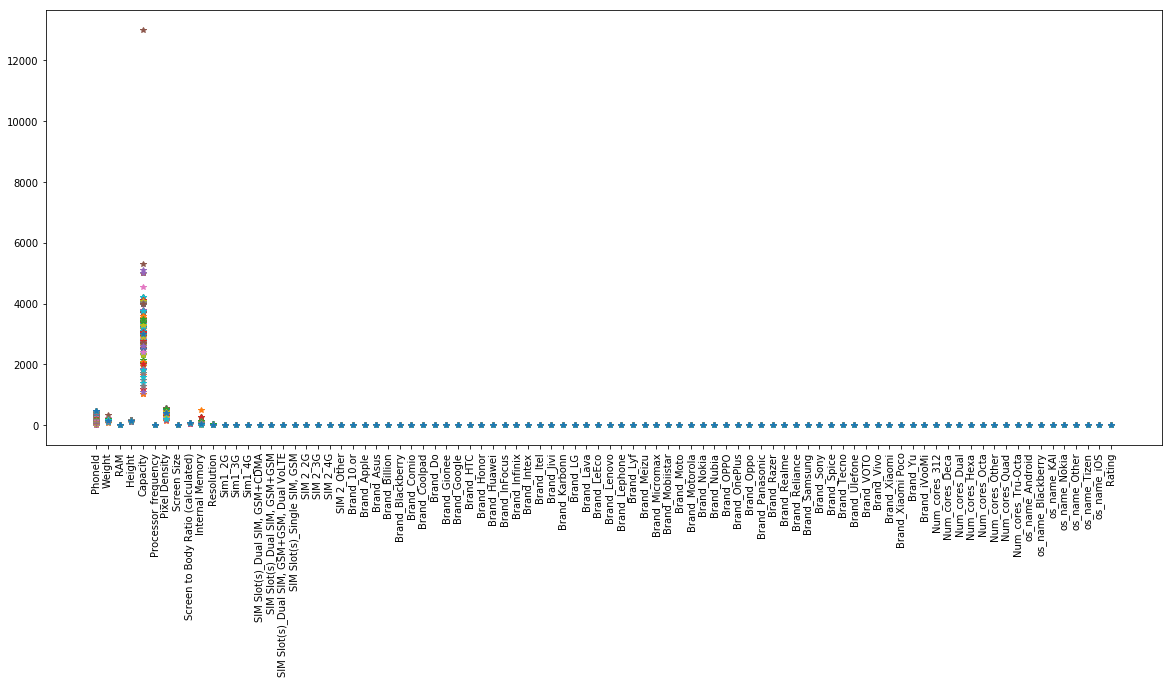

In [32]:
plt.figure(figsize=(20, 8))
plt.plot(train_new.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [121]:
train_new['Liked']  = train_new['Rating'].map(lambda x: 0 if x <= 3.9 else 1) 

In [122]:
train_new.groupby('Liked').mean()

,PhoneId,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,Rating
Liked,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,299.485437,158.84466,2.68932,146.980823,2984.805825,1.568447,327.116505,5.163689,69.088544,30.330097,7.601942,0.009709,0.048544,0.941748,0.000000,0.902913,0.038835,0.058252,0.330097,0.029126,0.582524,0.058252,0.019417,0.000000,0.009709,0.0,0.038835,0.000000,0.019417,0.0,0.038835,0.000000,0.048544,0.019417,0.00000,0.029126,0.009709,0.038835,0.009709,0.009709,0.019417,0.058252,0.019417,0.000000,0.058252,0.009709,0.009709,0.000000,0.116505,0.029126,0.048544,0.000000,0.077670,0.009709,0.000000,0.000000,0.009709,0.019417,0.009709,0.000000,0.009709,0.058252,0.048544,0.0,0.009709,0.000000,0.009709,0.019417,0.019417,0.000000,0.029126,0.009709,0.000000,0.019417,0.038835,0.009709,0.436893,0.009709,0.485437,0.000000,0.932039,0.019417,0.019417,0.000000,0.019417,0.009709,0.000000,3.620388
1,204.184874,162.42437,3.47479,151.229813,3280.676471,1.889538,351.609244,5.591555,73.766261,53.310924,10.453782,0.025210,0.008403,0.966387,0.004202,0.697479,0.201681,0.096639,0.159664,0.016807,0.726891,0.096639,0.000000,0.079832,0.029412,0.0,0.004202,0.004202,0.000000,0.0,0.025210,0.016807,0.004202,0.063025,0.02521,0.000000,0.008403,0.000000,0.012605,0.000000,0.000000,0.012605,0.016807,0.004202,0.037815,0.000000,0.000000,0.008403,0.012605,0.004202,0.042017,0.008403,0.054622,0.000000,0.058824,0.012605,0.021008,0.008403,0.000000,0.016807,0.000000,0.159664,0.016807,0.0,0.029412,0.004202,0.000000,0.100840,0.079832,0.012605,0.004202,0.000000,0.004202,0.000000,0.025210,0.046218,0.642857,0.021008,0.256303,0.004202,0.894958,0.000000,0.000000,0.004202,0.021008,0.000000,0.079832,4.268067


In [123]:
print(train_new['Liked'].value_counts())

1    238
0    103
Name: Liked, dtype: int64


In [124]:
X_train = train_new.drop('Liked', axis = 1)
X_train = X_train.drop('Rating', axis = 1)
X_train = X_train.drop('PhoneId', axis = 1)

Y_train = train_new['Liked']

In [125]:
test_new.head()

,PhoneId,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS
0,3,168,2,156.2,4230,1.8,271,6.20,80.85,16,5,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,11,205,4,156.0,5000,1.8,402,6.20,81.60,64,12,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,13,169,6,156.7,3500,2.0,409,6.30,83.84,64,25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,16,169,4,156.7,3500,2.0,409,6.30,83.84,64,16,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,19,181,4,158.6,4000,1.8,403,5.99,77.43,64,20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [126]:
X_test = test_new.drop('PhoneId', axis = 1) 
X_test.head()

,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS
0,168,2,156.2,4230,1.8,271,6.20,80.85,16,5,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,205,4,156.0,5000,1.8,402,6.20,81.60,64,12,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,169,6,156.7,3500,2.0,409,6.30,83.84,64,25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,169,4,156.7,3500,2.0,409,6.30,83.84,64,16,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,181,4,158.6,4000,1.8,403,5.99,77.43,64,20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [127]:
print(X_train.shape,Y_train.shape,X_test.shape)

(341, 86) (341,) (119, 86)


In [128]:
train_new.head()

,PhoneId,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,Rating,Liked
0,0,182,4,157.9,4000,1.8,403,6.26,80.68,64,20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.5,1
1,1,168,3,156.2,4230,1.8,271,6.20,80.85,32,8,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.5,1
2,2,168,3,157.0,3500,2.1,409,6.30,83.68,32,25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.4,1
3,4,169,4,159.8,3300,2.2,411,6.00,74.78,64,24,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.3,1
4,5,175,4,160.4,3750,2.2,396,6.50,84.23,64,16,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4.4,1


# Binarization of the training data

In [129]:
X_binarised_train = X_train
X_binarised_test = X_test

In [130]:
#X_binarised_train['Resolution'] = X_train['Resolution'].map(lambda x: 0 if x < X_train['Resolution'].mean() else 1)
#X_binarised_train['Capacity'] = X_train['Capacity'].map(lambda x: 0 if x < X_train['Capacity'].mean() else 1)
#X_binarised_train['Pixel Density'] = X_train['Pixel Density'].map(lambda x: 0 if x < X_train['Pixel Density'].mean() else 1)
#X_binarised_train['Screen to Body Ratio (calculated)'] = X_train['Screen to Body Ratio (calculated)'].map(lambda x: 0 if x < X_train['Screen to Body Ratio (calculated)'].mean() else 1)
#X_binarised_train['Internal Memory'] = X_train['Internal Memory'].map(lambda x: 0 if x < X_train['Internal Memory'].mean() else 1)


In [131]:
#X_binarised_train['RAM'] = X_train['RAM'].map(lambda x: 0 if x < X_train['RAM'].mean() else 1)
#X_binarised_train['Weight'] = X_train['Weight'].map(lambda x: 0 if x < X_train['Weight'].mean() else 1)
#X_binarised_train['Screen Size'] = X_train['Screen Size'].map(lambda x: 0 if x < X_train['Screen Size'].mean() else 1)
#X_binarised_train['Height'] = X_train['Height'].map(lambda x: 0 if x < X_train['Height'].mean() else 1)
#X_binarised_train['Processor_frequency'] = X_train['Processor_frequency'].map(lambda x: 0 if x < X_train['Processor_frequency'].mean() else 1 )


# Binarisation of the testing data

In [132]:
#X_binarised_test['Resolution'] = X_test['Resolution'].map(lambda x: 0 if x < X_test['Resolution'].mean() else 1)
#X_binarised_test['Capacity'] = X_test['Capacity'].map(lambda x: 0 if x < X_test['Capacity'].mean() else 1)
#X_binarised_test['Pixel Density'] = X_test['Pixel Density'].map(lambda x: 0 if x < X_test['Pixel Density'].mean() else 1)
#X_binarised_test['Screen to Body Ratio (calculated)'] = X_test['Screen to Body Ratio (calculated)'].map(lambda x: 0 if x < X_test['Screen to Body Ratio (calculated)'].mean() else 1)
#X_binarised_test['Internal Memory'] = X_test['Internal Memory'].map(lambda x: 0 if x < X_test['Internal Memory'].mean() else 1)


In [133]:
#X_binarised_test['RAM'] = X_test['RAM'].map(lambda x: 0 if x < X_test['RAM'].mean() else 1)
#X_binarised_test['Weight'] = X_test['Weight'].map(lambda x: 0 if x < X_test['Weight'].mean() else 1)
#X_binarised_test['Screen Size'] = X_test['Screen Size'].map(lambda x: 0 if x < X_test['Screen Size'].mean() else 1)
#X_binarised_test['Height'] = X_test['Height'].map(lambda x: 0 if x < X_test['Height'].mean() else 1)
#X_binarised_test['Processor_frequency'] = X_test['Processor_frequency'].map(lambda x: 0 if x < X_test['Processor_frequency'].mean() else 1 )


In [134]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels = [0, 1]) 
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [0, 1])
X_binarised_train.head()


,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS
0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [135]:
#train_new.head()
test_new.head()

,PhoneId,Weight,RAM,Height,Capacity,Processor_frequency,Pixel Density,Screen Size,Screen to Body Ratio (calculated),Internal Memory,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS
0,3,168,2,156.2,4230,1.8,271,6.20,80.85,16,5,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,11,205,4,156.0,5000,1.8,402,6.20,81.60,64,12,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,13,169,6,156.7,3500,2.0,409,6.30,83.84,64,25,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,16,169,4,156.7,3500,2.0,409,6.30,83.84,64,16,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,19,181,4,158.6,4000,1.8,403,5.99,77.43,64,20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


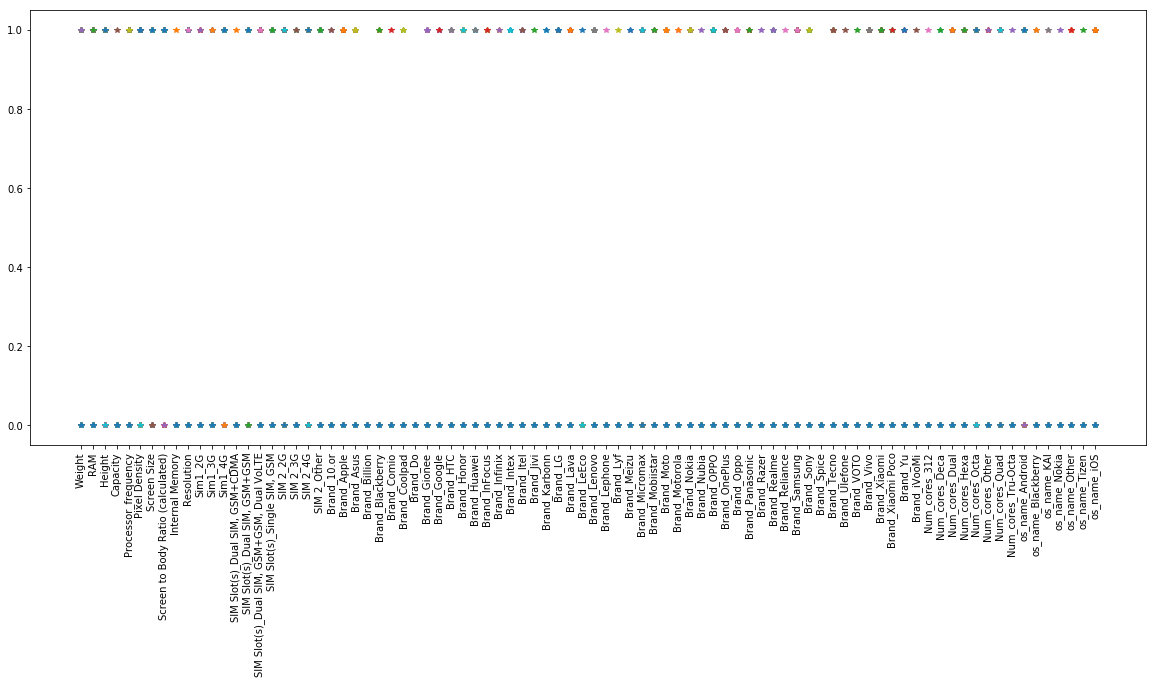

In [136]:
plt.figure(figsize=(20, 8))
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()

In [137]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

Y_train = Y_train.values

In [138]:
print(X_binarised_train.shape)


(341, 86)


In [139]:
print(X_binarised_train.shape, X_binarised_test.shape)

(341, 86) (119, 86)


# MP Neuron Class

In [140]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
        
    def model(self, x):
        return 1 if (sum(x) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}

        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)

        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b

        print('best b ', best_b)
        print('highest accuracy', accuracy[best_b])
        accuracy_list = list(accuracy.values())

        plt.plot(accuracy_list)
        plt.ylabel('accuracy')
        plt.xlabel('b values')
        plt.show()
        

best b  8
highest accuracy 0.706744868035


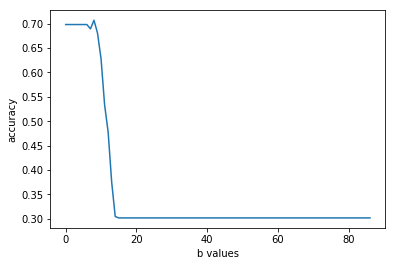

In [141]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train,Y_train)

In [142]:
Y_test_pred = mp_neuron.predict(X_binarised_test)

In [143]:
print(Y_test_pred.shape)

(119,)


In [144]:
print(Y_test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [145]:
submission = pd.DataFrame({'PhoneId':test_new['PhoneId'], 'Class':Y_test_pred})
submission = submission[['PhoneId', 'Class']]
submission.head()

,PhoneId,Class
0,3,1
1,11,1
2,13,1
3,16,1
4,19,1


In [146]:
submission.to_csv("submission.csv", index=False)